In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from google.colab import drive
from statsmodels.tsa.arima.model import ARIMA
warnings.filterwarnings("ignore")
drive.mount('/content/drive', force_remount = True)


Mounted at /content/drive


In [ ]:
sensor_data_path = '/content/drive/MyDrive/city_day.csv'
# Load the dataset
df = pd.read_csv(sensor_data_path)


In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [ ]:
pmean=df["PM2.5"].mean()
df["PM2.5"].fillna(pmean,inplace=True)

In [ ]:
pmmean=df["PM10"].mean()
df["PM10"].fillna(pmmean,inplace=True)

In [ ]:
nmean=df["NO"].mean()
df["NO"].fillna(nmean,inplace=True)

In [ ]:
nomean=df["NO2"].mean()
df["NO2"].fillna(nomean,inplace=True)

In [ ]:
noxmean=df["NOx"].mean()
df["NOx"].fillna(noxmean,inplace=True)

In [ ]:
nhmean=df["NH3"].mean()
df["NH3"].fillna(nhmean,inplace=True)

In [ ]:
cmean=df["CO"].mean()
df["CO"].fillna(cmean,inplace=True)

In [ ]:
smean=df["SO2"].mean()
df["SO2"].fillna(smean,inplace=True)

In [ ]:
omean=df["O3"].mean()
df["O3"].fillna(omean, inplace=True)

In [ ]:
bmean=df["Benzene"].mean()
df["Benzene"].fillna(bmean,inplace=True)

In [ ]:
tmean=df["Toluene"].mean()
df["Toluene"].fillna(tmean,inplace=True)

In [ ]:
xmean=df["Xylene"].mean()
df["Xylene"].fillna(xmean,inplace=True)

In [ ]:
amean=df["AQI"].mean()
df["AQI"].fillna(amean,inplace=True)

In [ ]:
df=df.drop('AQI_Bucket',axis=1)

In [ ]:
df.isna().sum()

City       0
Date       0
PM2.5      0
PM10       0
NO         0
NO2        0
NOx        0
NH3        0
CO         0
SO2        0
O3         0
Benzene    0
Toluene    0
Xylene     0
AQI        0
dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

import datetime

import math
from sklearn.preprocessing import MinMaxScaler

from tqdm import tqdm
plt.style.use("fivethirtyeight")
from keras.models import Sequential
from keras.layers import Dense, LSTM

In [ ]:
df["Date"] = pd.to_datetime(df["Date"])

In [ ]:
df.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI
0,Ahmedabad,2015-01-01,67.450578,118.127103,0.92,18.22,17.15,23.483476,0.92,27.64,133.36,0.00,0.02,0.00,166.463581
1,Ahmedabad,2015-01-02,67.450578,118.127103,0.97,15.69,16.46,23.483476,0.97,24.55,34.06,3.68,5.50,3.77,166.463581
2,Ahmedabad,2015-01-03,67.450578,118.127103,17.40,19.30,29.70,23.483476,17.40,29.07,30.70,6.80,16.40,2.25,166.463581
3,Ahmedabad,2015-01-04,67.450578,118.127103,1.70,18.48,17.97,23.483476,1.70,18.59,36.08,4.43,10.14,1.00,166.463581
4,Ahmedabad,2015-01-05,67.450578,118.127103,22.10,21.42,37.76,23.483476,22.10,39.33,39.31,7.01,18.89,2.78,166.463581


In [ ]:
df['Date']=df["Date"].dt.date

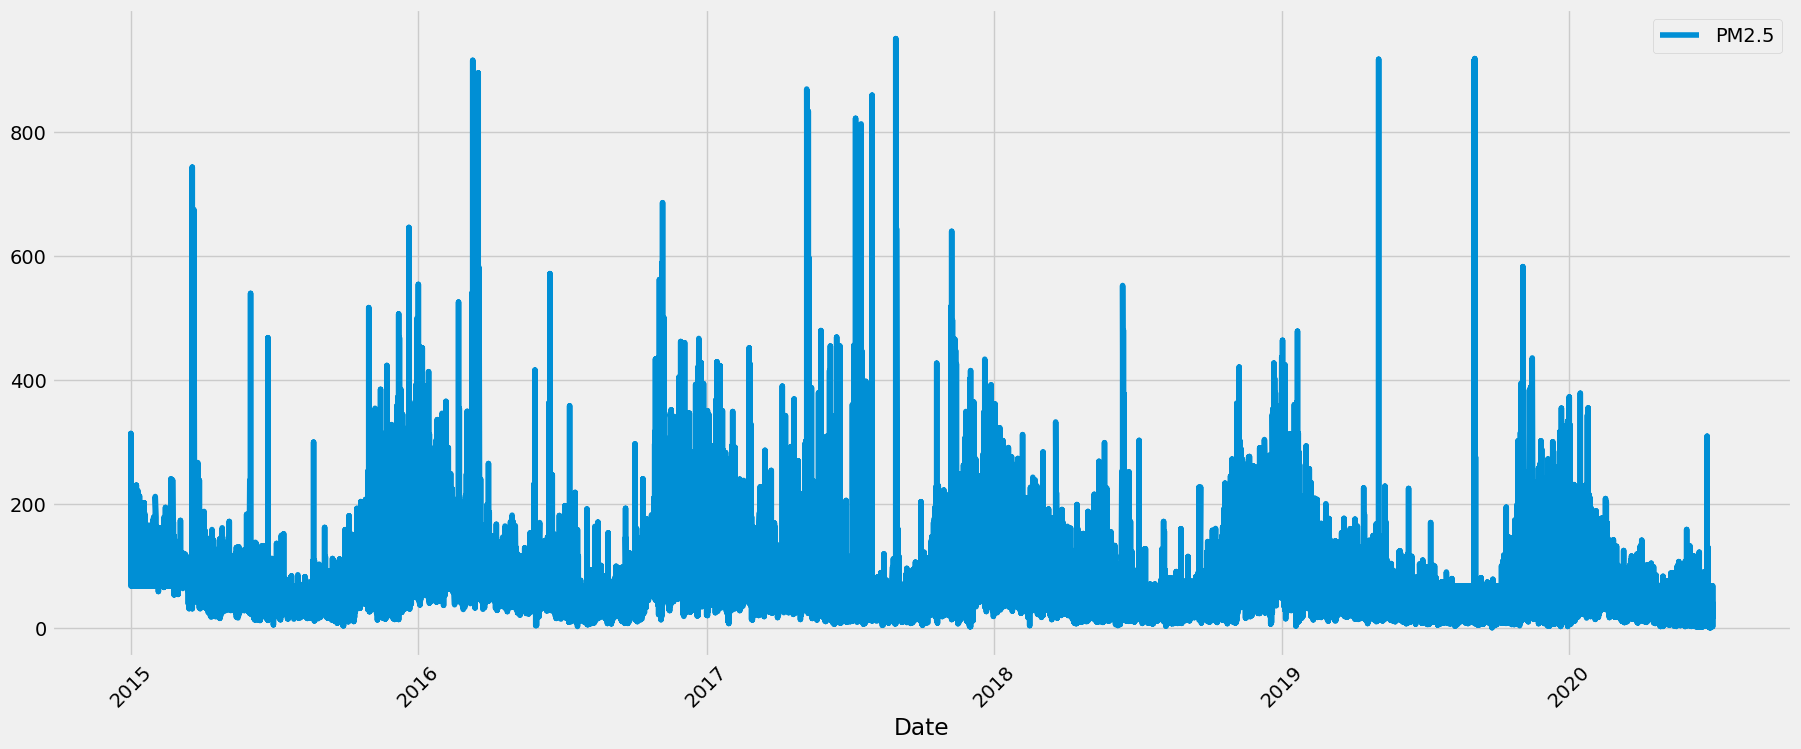

In [ ]:
df.plot(x='Date',y='PM2.5',figsize=(20,8))
plt.xticks(rotation=45)
plt.show()

<Axes: xlabel='Date'>

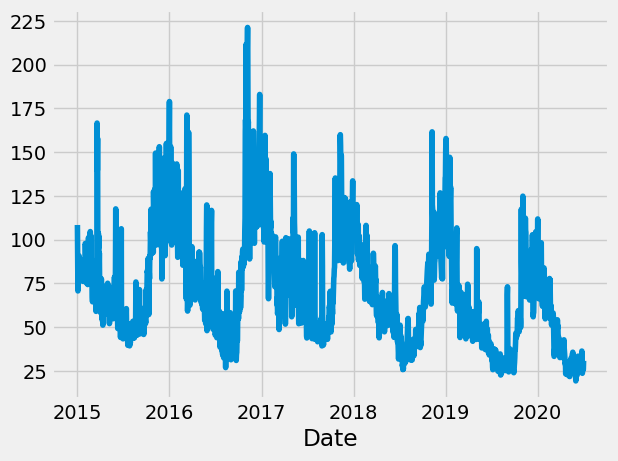

In [ ]:
df.groupby('Date')['PM2.5'].mean().plot()

<Axes: xlabel='Date', ylabel='PM2.5'>

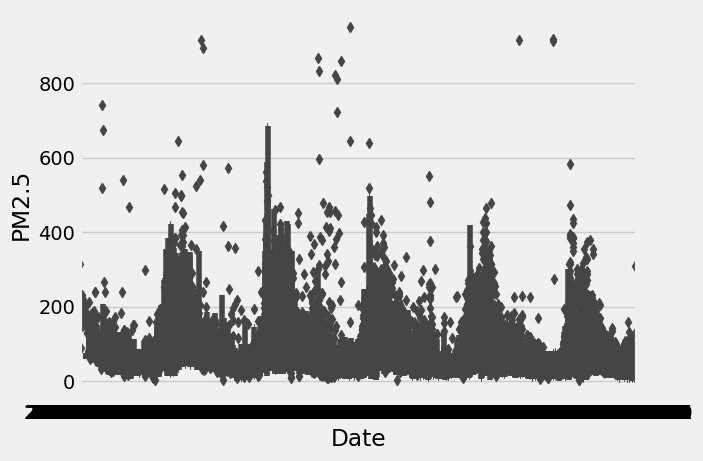

In [ ]:
df_year=df.loc[:,['Date','PM2.5']]
sns.boxplot(x='Date', y='PM2.5',data=df_year)

In [ ]:
df_date=pd.DataFrame(df.groupby('Date')['PM2.5'].mean())
df_date


,PM2.5
Date,
2015-01-01,108.412148
2015-01-02,87.238815
2015-01-03,70.738815
2015-01-04,79.506210
2015-01-05,78.757638
...,...
2020-06-27,26.492352
2020-06-28,27.278121
2020-06-29,25.938891


<Axes: xlabel='Date'>

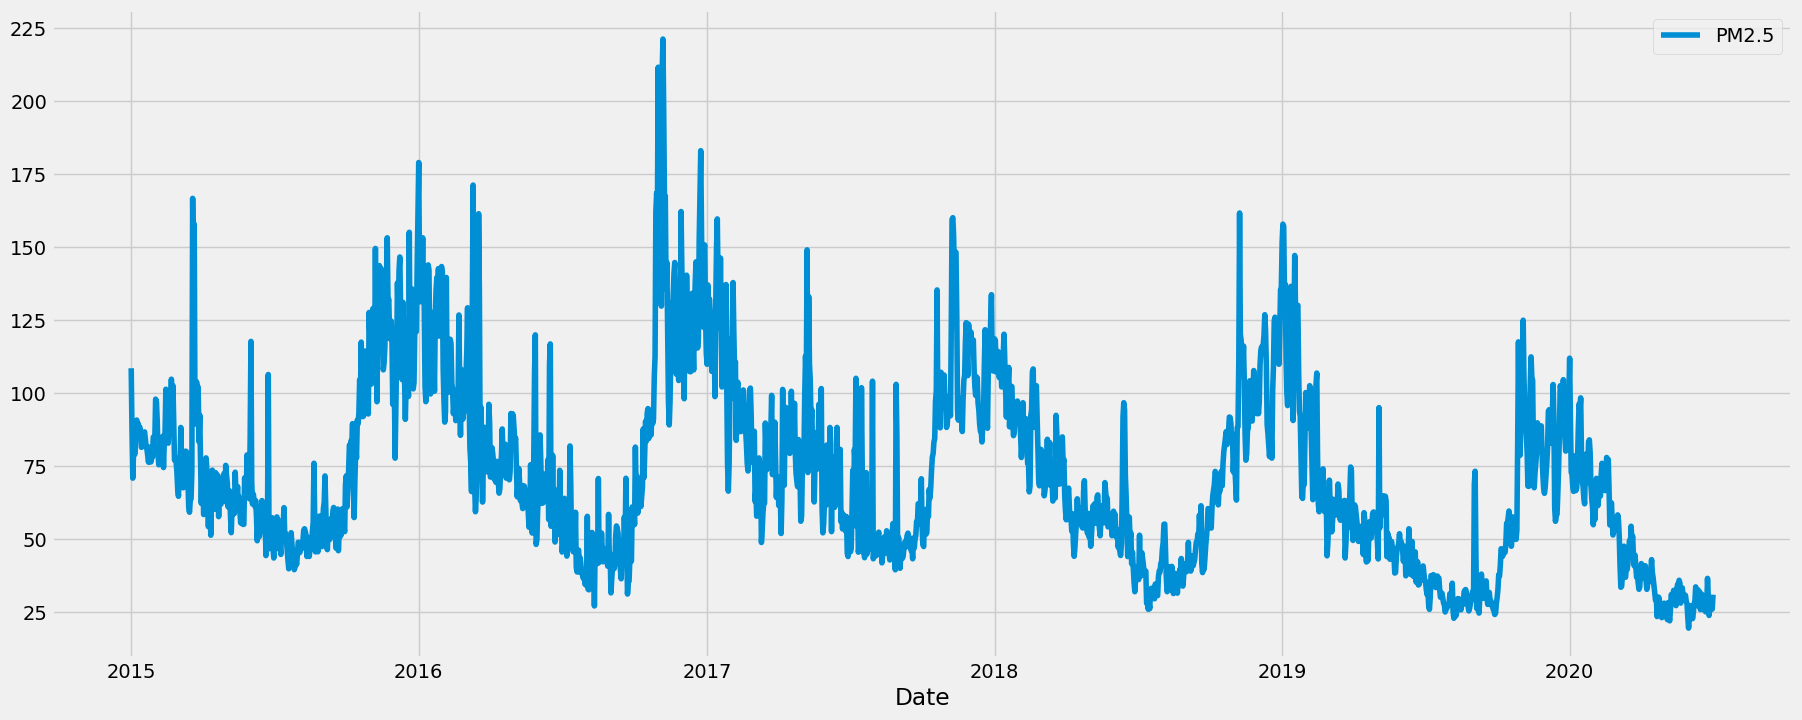

In [ ]:
df_date.plot(figsize=(20,8))

In [ ]:
dataset  = df_date.values
training_data_len = math.ceil(len(dataset)*.8)
training_data_len


1608

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))
scaled_data = sc.fit_transform(dataset)
print(scaled_data)


[[0.44116305]
 [0.33629059]
 [0.25456536]
 ...
 [0.03266936]
 [0.03235312]
 [0.05676984]]


In [ ]:
train_data = scaled_data[0:training_data_len, :]
x_train = []
y_train = []
num = 60
for i in range(num, len(train_data)):
    x_train.append(train_data[i-num:i , 0])
    y_train.append(train_data[i , 0])

In [ ]:
x_train, y_train = np.array(x_train), np.array(y_train)
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
x_train.shape

(1548, 60, 1)

In [ ]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))



In [ ]:
model.compile(optimizer = "adam", loss = "mean_squared_error")

In [ ]:
model.fit(x_train,y_train, batch_size=1, epochs=1)


1548/1548 [==============================] - 61s 36ms/step - loss: 0.0073


In [ ]:
test_data = scaled_data[training_data_len-60: , :]
x_test = []
y_test = dataset[training_data_len:,:]
for i in range(num, len(test_data)):
      x_test.append(test_data[i-num:i, 0])


In [ ]:
x_test = np.array(x_test)
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

print(x_test)

[[[0.27356485]
  [0.26723032]
  [0.18413649]
  ...
  [0.09442904]
  [0.12053419]
  [0.13509092]]

 [[0.26723032]
  [0.18413649]
  [0.14882374]
  ...
  [0.12053419]
  [0.13509092]
  [0.13814356]]

 [[0.18413649]
  [0.14882374]
  [0.20232704]
  ...
  [0.13509092]
  [0.13814356]
  [0.14365187]]

 ...

 [[0.04234472]
  [0.03871757]
  [0.03586788]
  ...
  [0.0215268 ]
  [0.03541068]
  [0.03930263]]

 [[0.03871757]
  [0.03586788]
  [0.02697695]
  ...
  [0.03541068]
  [0.03930263]
  [0.03266936]]

 [[0.03586788]
  [0.02697695]
  [0.01454671]
  ...
  [0.03930263]
  [0.03266936]
  [0.03235312]]]


In [ ]:
predictions = model.predict(x_test)
predictions = sc.inverse_transform(predictions)
model.save('lstm.h5')


13/13 [==============================] - 2s 27ms/step


In [ ]:
sensor_data_path2 = '/content/drive/MyDrive/data2.csv'

input_data = pd.read_csv(sensor_data_path2)
input_data["Date"] = pd.to_datetime(input_data["Date"])
input_data['Date']=input_data["Date"].dt.date
input_date=pd.DataFrame(input_data.groupby('Date')['PM2.5'].mean())
input_date

,PM2.5
Date,
2015-01-01,67.450578
2015-01-02,67.450578
2015-01-03,67.450578
2015-01-04,67.450578
2015-01-05,67.450578
...,...
2019-05-23,41.390000
2019-05-24,46.790000
2019-05-25,51.630000


In [ ]:
datasetdata  = input_date.values
training_data_lenpredict = math.ceil(len(dataset)*.8)
training_data_lenpredict

1608

In [ ]:
from tensorflow import keras
import numpy as np
import tensorflow as tf
model = keras.models.load_model("lstm.h5")
X_pred = input_date[-30:].values
scaler = MinMaxScaler(feature_range=(0, 1))
X_pred = scaler.fit_transform(X_pred)
predictdata = model.predict(X_pred)
predictdata = scaler.inverse_transform(predictdata)
from datetime import datetime, timedelta
# dates = input_date.index[-30:]
validdata = pd.DataFrame(data=predictdata, columns=["PM2.5"])
validdata["PM2.5"] = predictdata

validdata

1/1 [==============================] - 1s 832ms/step


,PM2.5
0,45.933125
1,51.253952
2,57.709450
3,52.053967
4,48.670589
5,44.280373
6,40.571239
7,43.094921
8,40.560364
9,36.842178


In [ ]:
train = df_date[:training_data_len]
valid = df_date[training_data_len:]
# valid["Predictions"] = predictions
valid["PM2.5"] = predictions
valid

,PM2.5
Date,
2019-05-28,42.556484
2019-05-29,43.668671
2019-05-30,44.802776
2019-05-31,46.469204
2019-06-01,47.072056
...,...
2020-06-27,20.638945
2020-06-28,19.786657
2020-06-29,19.421202


In [ ]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse


3.813853576893452

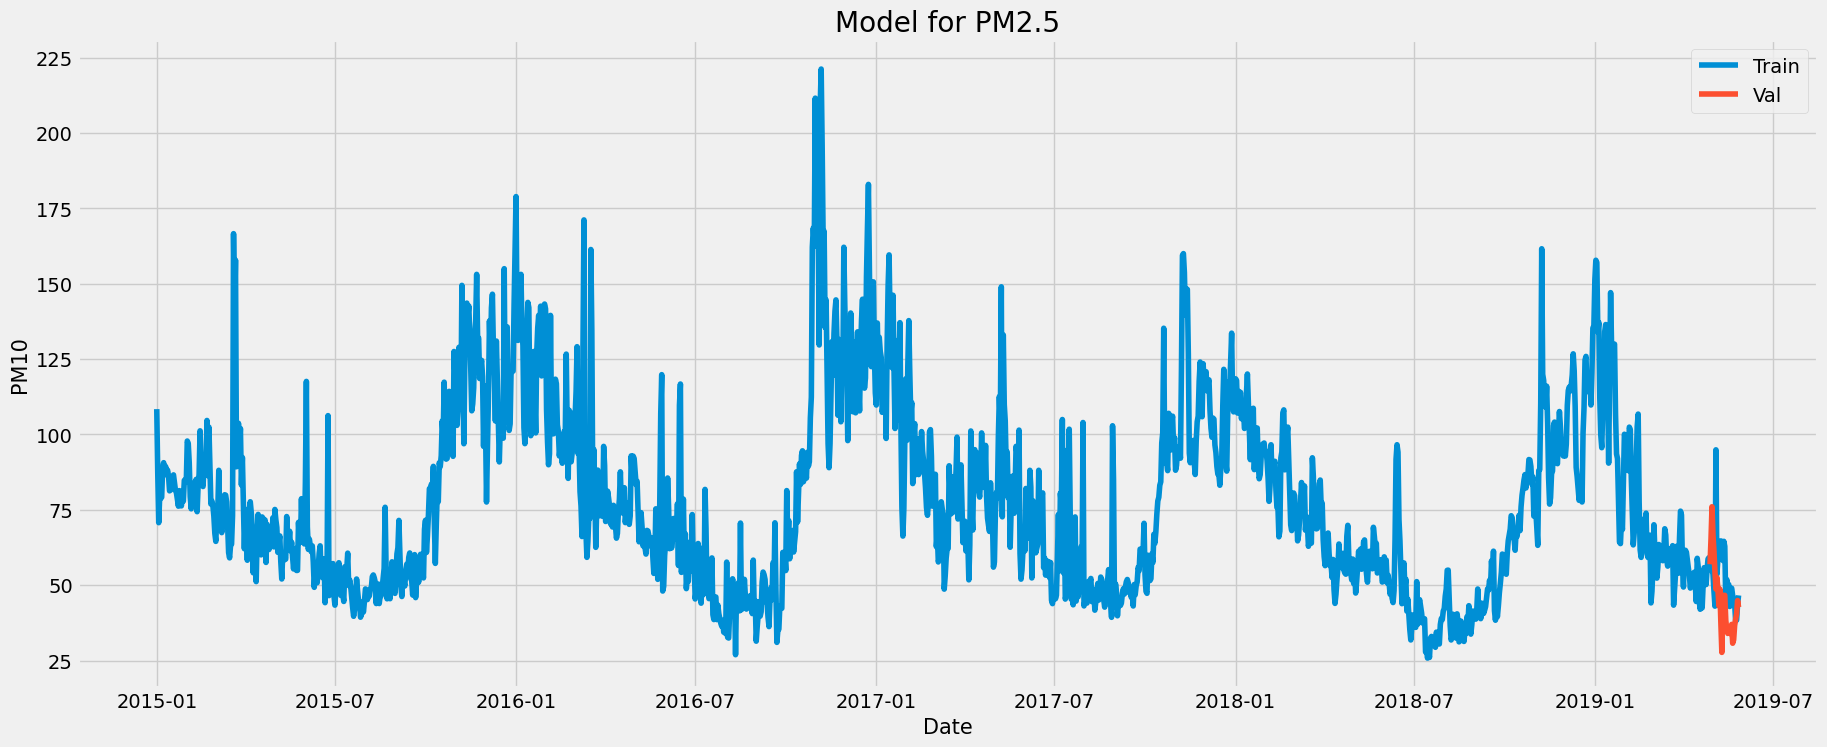

In [ ]:
plt.figure(figsize=(20,8))
plt.title("Model for PM2.5")
plt.xlabel("Date", fontsize = 15)
plt.ylabel("PM10",fontsize=15)
plt.plot(train[df_date.columns])
plt.plot(validdata['PM2.5'])
# plt.plot(validdata["Prediction"])
plt.legend(["Train","Val"])

In [ ]:
!pip install firebase-admin

In [ ]:
validdata.to_csv('/content/drive/MyDrive/predicted_lstmpm2.5.csv', index=False)

In [ ]:
import firebase_admin
from firebase_admin import credentials
from firebase_admin import db
json_path = './content/drive/MyDrive/projectnt114-firebase-adminsdk-3z33d-6d4b587f61'
cred = credentials.Certificate('/content/sample_data/serviceAccountkey.json')

firebase_admin.initialize_app(cred, {
    'databaseURL': 'https://projectnt114-default-rtdb.firebaseio.com'
})

In [ ]:
import json
import pandas as pd
pf = pd.read_csv('/content/drive/MyDrive/predicted_lstmpm2.5.csv')
json_data = pf.to_dict(orient='records')

ref = db.reference('/LSTM')

for row in json_data:
    for key, value in row.items():
        column_ref = ref.child(key.replace(".", "_")).push()
        column_ref.set(value)